In [352]:
import mnist
import scipy.misc
import numpy as np
from copy import deepcopy
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline

In [2]:
images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

In [651]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [652]:
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))

In [653]:
data = pd.DataFrame(train_images.transpose())
print("Input Data and Shape")
print(data.shape)

Input Data and Shape
(784, 60000)


In [654]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [655]:
k = 10

centroids = np.array([np.random.randint(0, 255, size=data.shape[0]) for i in range(k)])

print("Initial Centroids")
print(centroids)

Initial Centroids
[[203  68  93 ...,   9 162 106]
 [164 194  42 ...,  11  96  51]
 [ 99  28  85 ..., 106 202 176]
 ..., 
 [186  70  84 ..., 233  52 206]
 [194 122 114 ..., 112 110 122]
 [161 157 201 ..., 210 253  42]]


In [656]:
centroids.shape

(10, 784)

In [657]:
old_centroids = np.zeros(centroids.shape)

In [658]:
clusters       = np.zeros(data.shape[1])
error_function = dist(centroids, old_centroids, None)

In [659]:
error_function

13028.966612897586

In [660]:
error_function_plot = []

In [466]:
while max(error_function) > 10:
    
    print (error_function)
    
    error_function_plot.append(list(error_function))

    for i in range(len(clusters)):
        #clusters[i] = np.argmin([np.linalg.norm(data[i] - centroid) for centroid in centroids])  
        clusters[i] = np.argmin([euclidean_distances(np.array(data[i]).reshape(1,-1),centroid.reshape(1,-1)) for centroid in centroids])

    centroids_old = deepcopy(centroids)

    for i in range(k):
        points      = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        centroids[i] = np.array(np.mean(points, axis= 0))

    error_function = euclidean_distances(centroids, old_centroids)

TypeError: 'numpy.float64' object is not iterable

In [661]:
prev_error_function = 9999


while abs(prev_error_function - error_function) > 0.5:
    
    print (error_function)
    
    error_function_plot.append(error_function)

    for i in range(len(clusters)):
        clusters[i] = np.argmin([np.linalg.norm(data[i] - centroid) for centroid in centroids])  


    centroids_old = deepcopy(centroids)

    for i in range(k):
        points       = np.array([data[j] for j in range(data.shape[1]) if clusters[j] == i])
        centroids[i] = np.array(np.mean(points, axis= 0))

    prev_error_function = error_function
    error_function      = dist(centroids, old_centroids, None)

13028.9666129
5800.05198253
5637.96248657
5582.67400087
5552.21721477
5543.87689257
5539.8187696
5538.07240834
5532.16440464
5528.40266261
5525.71678608


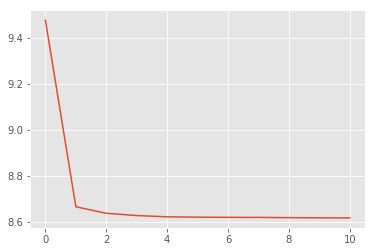

In [662]:
plt.plot(np.log(error_function_plot))

In [663]:
purity_df = pd.DataFrame([clusters, train_labels]).transpose()
purity_df.columns = ['yhat_test', 'y_test']

purity_numerator = 0
purity_denominator = len(purity_df)

for cluster in purity_df['yhat_test'].unique():
    
    purity_numerator += int(purity_df[purity_df['yhat_test'] == cluster].groupby('y_test')\
                                .count()\
                                .sort_values('yhat_test', ascending=False)\
                                .iloc[0])
purity_numerator/purity_denominator

0.5427666666666666

In [664]:
gini_coeffs = np.zeros([len(purity_df['yhat_test'].unique()), 2])
i = 0

for cluster in clusters:

    if (i < k):
        
        gini_coeffs[i][0] = sum(((purity_df[purity_df['yhat_test'] == cluster].groupby('y_test')\
                                    .count()\
                                    .sort_values('yhat_test', ascending=False)\
                            /len(purity_df[purity_df['yhat_test'] == cluster]))\
                            **2)\
                            ['yhat_test'])

        gini_coeffs[i][1] = len(purity_df[purity_df['yhat_test'] == cluster])

        i += 1
    
    else: break

sum(gini_coeffs[:,0] * gini_coeffs[:,1]) / sum(gini_coeffs[:,1])

0.36344566000763334